## <span style="color : #8470FF">***Les librairies***</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

## <span style="color : #8470FF">***Chargement et affichage des données***</span>
## <span style="color : #00BFFF">***Fichier erp.xlsx***</span>
* ### <span style="color : #20B2AA">***Nettoyage et préparation des fichiers***</span>

In [2]:
erp_df = pd.read_excel('erp.xlsx')
erp_df

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock


* ### <span style="color : #20B2AA">***Vérification du type de données***</span>

In [3]:
erp_df.dtypes

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

* ### <span style="color : #20B2AA">***Vérification de valeurs nulles***</span>

In [4]:
erp_df.isnull().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

* ### <span style="color : #20B2AA">***Vérification de l'identifiant unique***</span>
### <span style="color : #FFA500">***On écrit une fonction qui permettra de tester si une cle est fiable***</span>

In [5]:
def testerCle(df, colonne):
    """Fonction qui prend en arguments un dataframe et la colonne qui composent la clé primaire à tester."""
    id_df = df[colonne]
    a = np.array(id_df)
    print ('Identifiants uniques:')
    u = np.unique(a)
    print (u)

    print ('\n')
    print ("Nombre d'identifiants uniques :")
    print (len(u))

    print ('\n')
    print ("Nombre d'éléments en double:")
    u,indices = np.unique(a,return_counts = True)
    print (indices)

In [6]:
testerCle(erp_df, 'product_id')

Identifiants uniques:
[3847 3849 3850 4032 4039 4040 4041 4042 4043 4045 4046 4047 4048 4049
 4050 4051 4052 4053 4054 4055 4056 4057 4058 4059 4060 4062 4063 4064
 4065 4066 4067 4068 4069 4070 4071 4072 4073 4074 4075 4076 4077 4078
 4079 4081 4083 4084 4085 4086 4087 4090 4092 4094 4095 4096 4097 4098
 4099 4100 4101 4102 4103 4104 4105 4106 4107 4108 4115 4130 4132 4137
 4138 4139 4141 4142 4144 4146 4147 4148 4149 4150 4151 4152 4153 4154
 4155 4156 4157 4158 4159 4160 4161 4162 4163 4164 4165 4166 4167 4168
 4170 4171 4172 4173 4174 4176 4177 4178 4179 4180 4181 4182 4183 4186
 4187 4188 4190 4191 4192 4193 4194 4195 4196 4197 4198 4200 4201 4202
 4203 4204 4205 4207 4208 4209 4210 4211 4212 4213 4215 4216 4217 4219
 4220 4221 4222 4223 4224 4225 4227 4228 4229 4231 4232 4233 4235 4239
 4240 4241 4242 4244 4245 4246 4248 4250 4251 4253 4254 4256 4257 4258
 4260 4261 4262 4263 4264 4265 4267 4268 4269 4270 4271 4272 4274 4275
 4276 4277 4278 4279 4280 4281 4283 4285 4286 4287 4288

### <span style="color : #000000">***Aucun doublon trouvé***</span>

* ### <span style="color : #20B2AA">***Vérification des données dans toutes les colonnes***</span>
### <span style="color : #000000">***Une erreur a été trouvée dans une ligne, la valeur de 'stock_status' dans 'product_id	=4954' doit être 'outofstock' car son 'stock_quantity' est égal à zéro***</span>

In [7]:
erp_df.sort_values(['stock_status', 'stock_quantity'], ascending=[True, True])

,product_id,onsale_web,price,stock_quantity,stock_status
443,4954,1,25.00,0,instock
72,4141,1,39.00,1,instock
85,4156,1,20.35,1,instock
154,4240,1,28.00,1,instock
176,4269,1,10.20,1,instock
...,...,...,...,...,...
735,6578,1,40.00,0,outofstock
759,6751,1,46.50,0,outofstock
770,6886,1,42.00,0,outofstock
774,6900,0,30.00,0,outofstock


### <span style="color : #000000">***Le valeur en 'stock_status' est modifiée pour être cohérente***</span>

In [8]:
erp_df.iloc[443, 4] = 'outofstock'
erp_df.sort_values(['stock_status', 'stock_quantity'], ascending=[True, True])

,product_id,onsale_web,price,stock_quantity,stock_status
72,4141,1,39.00,1,instock
85,4156,1,20.35,1,instock
154,4240,1,28.00,1,instock
176,4269,1,10.20,1,instock
182,4276,1,17.60,1,instock
...,...,...,...,...,...
735,6578,1,40.00,0,outofstock
759,6751,1,46.50,0,outofstock
770,6886,1,42.00,0,outofstock
774,6900,0,30.00,0,outofstock


* ### <span style="color : #20B2AA">***Correction des noms de colonnes***</span>

In [9]:
erp_df = erp_df.rename(columns={'product_id':'Id du produit', 'onsale_web':'Vente sur le web', 'price':'Prix unitaire', 'stock_quantity':'Quantité en stock', 'stock_status':'État des stocks'})
erp_df

,Id du produit,Vente sur le web,Prix unitaire,Quantité en stock,État des stocks
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock


## <span style="color : #00BFFF">***Fichier web.xlsx***</span>
* ### <span style="color : #20B2AA">***Nettoyage et préparation des fichiers***</span>

In [10]:
web_df = pd.read_excel('web.xlsx')
web_df

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


* ### <span style="color : #20B2AA">***Affichage des colonnes nécessaires pour l'analyse***</span>

In [11]:
web_df = web_df[['sku','total_sales','post_date','post_title','post_type']]
web_df

,sku,total_sales,post_date,post_title,post_type
0,bon-cadeau-25-euros,10.0,2018-06-01 13:53:46,Bon cadeau de 25€,product
1,15298,6.0,2018-02-08 12:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,product
2,15296,0.0,2018-02-08 13:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,product
3,15300,0.0,2018-02-08 14:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,product
4,19814,3.0,2018-02-09 14:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,product
...,...,...,...,...,...
1508,16135,5.0,2020-04-25 13:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,attachment
1509,15891,0.0,2020-05-02 14:53:40,Camin Larredya Jurançon Sec La Virada 2018,attachment
1510,15887,0.0,2020-05-02 15:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,attachment
1511,13127-1,0.0,2020-06-09 15:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,attachment


* ### <span style="color : #20B2AA">***Vérification du type de données***</span>
### <span style="color : #000000">***Le type de données de la colonne 'sku' est objet, il y a donc des données différentes, et nous éviterons de le changer pour correspondre à la liaison avec d'autres tables***</span>

In [12]:
web_df.dtypes

sku                    object
total_sales           float64
post_date      datetime64[ns]
post_title             object
post_type              object
dtype: object

* ### <span style="color : #20B2AA">***Vérification de valeurs nulles***</span>

In [13]:
web_df.isnull().sum()

sku            85
total_sales    83
post_date      83
post_title     83
post_type      83
dtype: int64

### <span style="color : #000000">***Il y a deux données qui n'ont pas d'identifiant***</span>

In [14]:
web_df.loc[web_df['sku'].isnull(),:].sort_values("post_title", ascending=False)

,sku,total_sales,post_date,post_title,post_type
470,NaN,0.0,2018-07-31 12:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,product
471,NaN,0.0,2018-08-08 11:23:43,Pierre Jean Villa Condrieu Jardin Suspendu 2018,product
178,NaN,NaN,NaT,NaN,NaN
179,NaN,NaN,NaT,NaN,NaN
227,NaN,NaN,NaT,NaN,NaN
...,...,...,...,...,...
792,NaN,NaN,NaT,NaN,NaN
793,NaN,NaN,NaT,NaN,NaN
794,NaN,NaN,NaT,NaN,NaN
795,NaN,NaN,NaT,NaN,NaN


* ### <span style="color : #20B2AA">***Les données qui ne contiennent pas de valeurs nulles dans toutes ses colonnes sont filtrées***</span>

In [15]:
web_df_not_null = web_df[web_df.post_title.notnull()].copy()
web_df_not_null

,sku,total_sales,post_date,post_title,post_type
0,bon-cadeau-25-euros,10.0,2018-06-01 13:53:46,Bon cadeau de 25€,product
1,15298,6.0,2018-02-08 12:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,product
2,15296,0.0,2018-02-08 13:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,product
3,15300,0.0,2018-02-08 14:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,product
4,19814,3.0,2018-02-09 14:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,product
...,...,...,...,...,...
1508,16135,5.0,2020-04-25 13:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,attachment
1509,15891,0.0,2020-05-02 14:53:40,Camin Larredya Jurançon Sec La Virada 2018,attachment
1510,15887,0.0,2020-05-02 15:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,attachment
1511,13127-1,0.0,2020-06-09 15:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,attachment


* ### <span style="color : #20B2AA">***Nous changeons le type de données de la colonne 'sku'***</span>
### <span style="color : #000000">***Le format est changé en String pour conserver les valeurs avec des caractères***</span>

In [16]:
web_df_not_null['sku'] = web_df_not_null['sku'].astype(str)
web_df_not_null['sku']

0       bon-cadeau-25-euros
1                     15298
2                     15296
3                     15300
4                     19814
               ...         
1508                  16135
1509                  15891
1510                  15887
1511                13127-1
1512                  16230
Name: sku, Length: 1430, dtype: object

* ### <span style="color : #20B2AA">***Vérification de l'identifiant unique***</span>

In [17]:
testerCle(web_df_not_null, 'sku')

Identifiants uniques:
['10014' '10459' '10775' '10814' '11049' '11225' '11258' '11277' '11467'
 '11585' '11586' '11587' '11601' '11602' '11641' '11668' '11669' '11736'
 '11847' '11849' '11862' '11933' '11996' '11997' '12045' '12194' '12203'
 '12315' '12339' '12365' '12366' '12476' '12494' '12496' '12585' '12586'
 '12587' '12588' '12589' '12599' '12639' '12640' '12641' '12657' '12771'
 '12790' '12791' '12857' '12869' '12881' '12882' '12942' '13032' '13052'
 '13072' '13073' '13074' '13078' '13089' '13096' '13117' '13127' '13127-1'
 '13172' '13209' '13211' '13215' '13217' '13230' '13291' '13313' '13379'
 '13412' '13416' '13435' '13453' '13460' '13514' '13515' '13516' '13517'
 '13520' '13531' '13557' '13567' '13572' '13599' '1360' '13604' '13627'
 '1364' '13647' '13659' '1366' '13662' '13736' '13754' '13762' '13765'
 '13766' '13809' '13814' '13849' '13853' '13854' '13895' '13904' '13905'
 '13910' '13913' '13914' '13957' '13958' '13959' '13965' '13969' '13982'
 '13996' '14000' '14089' '1409

### <span style="color : #000000">***Des identifiants répétés sont trouvés***</span>
### <span style="color : #000000">***On les regroupe par la colonne 'sku' et 'post_type', et on voit qu'elles se répètent car l'une contient les informations du produit (product) et une autre sur le web (attachment) dans les données d'origine.***</span>

In [18]:
web_df_not_null.sort_values(['sku', 'post_type'], ascending=[False, False]).head(10)

,sku,total_sales,post_date,post_title,post_type
470,nan,0.0,2018-07-31 12:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,product
471,nan,0.0,2018-08-08 11:23:43,Pierre Jean Villa Condrieu Jardin Suspendu 2018,product
0,bon-cadeau-25-euros,10.0,2018-06-01 13:53:46,Bon cadeau de 25€,product
1209,bon-cadeau-25-euros,10.0,2018-06-01 13:53:46,Bon cadeau de 25€,attachment
422,9937,4.0,2018-05-17 12:55:13,Marcel Richaud Cairanne Rouge Les Estrambords ...,product
1201,9937,4.0,2018-05-17 12:55:13,Marcel Richaud Cairanne Rouge Les Estrambords ...,attachment
215,9636,0.0,2018-03-22 10:44:57,Wemyss Malts Blended Malt Scotch Whisky The Hi...,product
1011,9636,0.0,2018-03-22 10:44:57,Wemyss Malts Blended Malt Scotch Whisky The Hi...,attachment
206,9562,0.0,2018-03-02 10:57:02,Champagne Larmandier-Bernier Latitude,product
1002,9562,0.0,2018-03-02 10:57:02,Champagne Larmandier-Bernier Latitude,attachment


In [19]:
web_df_not_null[web_df_not_null['post_type'] == 'product']

,sku,total_sales,post_date,post_title,post_type
0,bon-cadeau-25-euros,10.0,2018-06-01 13:53:46,Bon cadeau de 25€,product
1,15298,6.0,2018-02-08 12:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,product
2,15296,0.0,2018-02-08 13:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,product
3,15300,0.0,2018-02-08 14:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,product
4,19814,3.0,2018-02-09 14:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,product
...,...,...,...,...,...
762,16135,5.0,2020-04-25 13:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,product
767,15891,0.0,2020-05-02 14:53:40,Camin Larredya Jurançon Sec La Virada 2018,product
768,15887,0.0,2020-05-02 15:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,product
797,13127-1,0.0,2020-06-09 15:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,product


In [20]:
web_df_not_null[web_df_not_null['post_type'] == 'attachment']

,sku,total_sales,post_date,post_title,post_type
799,15298,6.0,2018-02-08 12:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,attachment
800,15296,0.0,2018-02-08 13:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,attachment
801,15300,0.0,2018-02-08 14:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,attachment
802,19814,3.0,2018-02-09 14:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,attachment
803,19815,0.0,2018-02-12 09:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,attachment
...,...,...,...,...,...
1508,16135,5.0,2020-04-25 13:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,attachment
1509,15891,0.0,2020-05-02 14:53:40,Camin Larredya Jurançon Sec La Virada 2018,attachment
1510,15887,0.0,2020-05-02 15:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,attachment
1511,13127-1,0.0,2020-06-09 15:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,attachment


### <span style="color : #000000">***Il y a 716 données filtrées par "product" et 714 par "attachment", cette différence est due au fait que nous avons trouvé 2 valeurs sans identifiant***</span>

### <span style="color : #000000">***Pour nos calculs nous utiliserons les valeurs filtrées par 'product'***</span>

In [21]:
web_product_df = web_df_not_null[web_df_not_null['post_type'] == 'product']
web_product_df

,sku,total_sales,post_date,post_title,post_type
0,bon-cadeau-25-euros,10.0,2018-06-01 13:53:46,Bon cadeau de 25€,product
1,15298,6.0,2018-02-08 12:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,product
2,15296,0.0,2018-02-08 13:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,product
3,15300,0.0,2018-02-08 14:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,product
4,19814,3.0,2018-02-09 14:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,product
...,...,...,...,...,...
762,16135,5.0,2020-04-25 13:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,product
767,15891,0.0,2020-05-02 14:53:40,Camin Larredya Jurançon Sec La Virada 2018,product
768,15887,0.0,2020-05-02 15:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,product
797,13127-1,0.0,2020-06-09 15:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,product


* ### <span style="color : #20B2AA">***Vérifier à nouveau les valeurs nulles***</span>

In [22]:
web_product_df[web_product_df['sku'] == 'nan']

,sku,total_sales,post_date,post_title,post_type
470,nan,0.0,2018-07-31 12:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,product
471,nan,0.0,2018-08-08 11:23:43,Pierre Jean Villa Condrieu Jardin Suspendu 2018,product


### <span style="color : #000000">***Comme nous ne pouvons pas attribuer d'identifiant à ces deux données, nous ne l'utiliserons pas dans notre DataFrame Final***</span>

In [23]:
web_final_df = web_product_df[web_product_df['sku'] != 'nan']
web_final_df

,sku,total_sales,post_date,post_title,post_type
0,bon-cadeau-25-euros,10.0,2018-06-01 13:53:46,Bon cadeau de 25€,product
1,15298,6.0,2018-02-08 12:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,product
2,15296,0.0,2018-02-08 13:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,product
3,15300,0.0,2018-02-08 14:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,product
4,19814,3.0,2018-02-09 14:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,product
...,...,...,...,...,...
762,16135,5.0,2020-04-25 13:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,product
767,15891,0.0,2020-05-02 14:53:40,Camin Larredya Jurançon Sec La Virada 2018,product
768,15887,0.0,2020-05-02 15:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,product
797,13127-1,0.0,2020-06-09 15:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,product


* ### <span style="color : #20B2AA">***Correction des noms de colonnes***</span>

In [24]:
web_final_df = web_final_df.rename(columns={'sku':'Id web', 'total_sales':'Ventes totales', 'post_date':'Date de publication', 'post_title':'Titre de la publication', 'post_type':'Type de publication'})
web_final_df

,Id web,Ventes totales,Date de publication,Titre de la publication,Type de publication
0,bon-cadeau-25-euros,10.0,2018-06-01 13:53:46,Bon cadeau de 25€,product
1,15298,6.0,2018-02-08 12:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,product
2,15296,0.0,2018-02-08 13:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,product
3,15300,0.0,2018-02-08 14:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,product
4,19814,3.0,2018-02-09 14:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,product
...,...,...,...,...,...
762,16135,5.0,2020-04-25 13:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,product
767,15891,0.0,2020-05-02 14:53:40,Camin Larredya Jurançon Sec La Virada 2018,product
768,15887,0.0,2020-05-02 15:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,product
797,13127-1,0.0,2020-06-09 15:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,product


## <span style="color : #00BFFF">***Fichier liaison.xlsx***</span>
* ### <span style="color : #20B2AA">***Nettoyage et préparation des fichiers***</span>

In [25]:
liaison_df = pd.read_excel('liaison.xlsx')
liaison_df

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


* ### <span style="color : #20B2AA">***Vérification du type de données***</span>

In [26]:
liaison_df.dtypes

product_id     int64
id_web        object
dtype: object

* ### <span style="color : #20B2AA">***Vérification de valeurs nulles***</span>

In [27]:
liaison_df.isnull().sum()

product_id     0
id_web        91
dtype: int64

### <span style="color : #000000">***Nous avons trouvé 91 valeurs nulles dans 'id_web'***</span>

In [28]:
liaison_df.loc[liaison_df['id_web'].isnull(),:].sort_values("id_web", ascending=False)

,product_id,id_web
19,4055,NaN
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
...,...,...
817,7196,NaN
818,7200,NaN
819,7201,NaN
820,7203,NaN


### <span style="color : #000000">***Comme nous ne savons pas quel identifiant 'id_web' attribuer à certains identifiants 'product_id', nous filtrons uniquement notre DataFrame Final Liaison par les valeurs que nous avons.***</span>

In [29]:
liaison_final_df = liaison_df[liaison_df.id_web.notnull()].copy()
liaison_final_df['id_web'] = liaison_final_df['id_web'].astype(str)
liaison_final_df

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
792,7023,15891
793,7025,15887
822,7247,13127-1
823,7329,14680-1


* ### <span style="color : #20B2AA">***Vérification de l'identifiant unique***</span>

In [30]:
testerCle(liaison_final_df, 'product_id')

Identifiants uniques:
[3847 3849 3850 4032 4039 4040 4041 4042 4043 4045 4046 4047 4048 4049
 4050 4051 4052 4053 4054 4056 4057 4058 4059 4060 4062 4063 4064 4065
 4066 4067 4068 4069 4070 4071 4072 4073 4074 4075 4076 4077 4078 4079
 4081 4083 4084 4085 4086 4087 4094 4095 4096 4097 4098 4099 4100 4101
 4102 4103 4104 4105 4106 4107 4108 4115 4130 4132 4137 4138 4139 4141
 4142 4144 4146 4147 4148 4149 4150 4151 4152 4153 4154 4155 4156 4157
 4158 4159 4160 4161 4162 4163 4164 4165 4166 4167 4168 4170 4171 4172
 4173 4174 4176 4177 4178 4179 4180 4181 4182 4183 4186 4187 4188 4190
 4191 4192 4193 4194 4196 4197 4198 4200 4201 4202 4203 4204 4205 4207
 4208 4210 4211 4212 4213 4215 4216 4217 4219 4220 4221 4222 4223 4224
 4225 4227 4228 4229 4231 4232 4235 4239 4240 4241 4242 4244 4245 4246
 4248 4250 4251 4253 4254 4256 4257 4258 4260 4261 4262 4263 4264 4265
 4267 4268 4269 4270 4271 4272 4274 4275 4276 4277 4280 4281 4283 4285
 4286 4287 4288 4289 4297 4298 4299 4300 4301 4303 4304

### <span style="color : #000000">***Aucun doublon trouvé***</span>

* ### <span style="color : #20B2AA">***Correction des noms de colonnes***</span>

In [31]:
liaison_final_df = liaison_final_df.rename(columns={'product_id':'Id du produit', 'id_web':'Id web'})
liaison_final_df

,Id du produit,Id web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
792,7023,15891
793,7025,15887
822,7247,13127-1
823,7329,14680-1


# <center><span style="color : #708090">**Le chiffre d’affaires par produit**</span>

* ### <span style="color : #20B2AA">***Merge entre (erp_df) et (liaison_final_df)***</span>

In [32]:
merge_erp_liaison = pd.merge(erp_df, liaison_final_df, on='Id du produit', how='left')
merge_erp_liaison

,Id du produit,Vente sur le web,Prix unitaire,Quantité en stock,État des stocks,Id web
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815
...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,NaN
821,7204,0,45.0,9,instock,NaN
822,7247,1,54.8,23,instock,13127-1
823,7329,0,26.5,14,instock,14680-1


* ### <span style="color : #20B2AA">***Vérification de valeurs nulles***</span>

In [33]:
merge_erp_liaison.isnull().sum()

Id du produit         0
Vente sur le web      0
Prix unitaire         0
Quantité en stock     0
État des stocks       0
Id web               91
dtype: int64

In [34]:
merge_erp_liaison.loc[merge_erp_liaison['Id web'].isnull(),:]

,Id du produit,Vente sur le web,Prix unitaire,Quantité en stock,État des stocks,Id web
19,4055,0,86.1,0,outofstock,NaN
49,4090,0,73.0,0,outofstock,NaN
50,4092,0,47.0,0,outofstock,NaN
119,4195,0,14.1,0,outofstock,NaN
131,4209,0,73.5,0,outofstock,NaN
...,...,...,...,...,...,...
817,7196,0,31.0,55,instock,NaN
818,7200,0,31.0,6,instock,NaN
819,7201,0,31.0,18,instock,NaN
820,7203,0,45.0,30,instock,NaN


### <span style="color : #000000">***Il y a 91 données sans résultat après le Merge***</span>
### <span style="color : #000000">***Maintenant, nous devons lier le résultat avec l'identifiant Web de la table Web, pour cela nous filtrons uniquement les données qui ont un identifiant Web pour optimiser la recherche***</span>

In [35]:
merge_erp_liaison_not_null = merge_erp_liaison[merge_erp_liaison['Id web'].notnull()].copy()
merge_erp_liaison_not_null

,Id du produit,Vente sur le web,Prix unitaire,Quantité en stock,État des stocks,Id web
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815
...,...,...,...,...,...,...
792,7023,1,27.5,15,instock,15891
793,7025,1,69.0,2,instock,15887
822,7247,1,54.8,23,instock,13127-1
823,7329,0,26.5,14,instock,14680-1


* ### <span style="color : #20B2AA">***Merge entre (merge_erp_liaison_not_null) et (web_final_df)***</span>

In [36]:
merge_erp_liaison_web = pd.merge(merge_erp_liaison_not_null, web_final_df, on='Id web', how='left')
merge_erp_liaison_web

,Id du produit,Vente sur le web,Prix unitaire,Quantité en stock,État des stocks,Id web,Ventes totales,Date de publication,Titre de la publication,Type de publication
0,3847,1,24.2,0,outofstock,15298,6.0,2018-02-08 12:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,product
1,3849,1,34.3,0,outofstock,15296,0.0,2018-02-08 13:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,product
2,3850,1,20.8,0,outofstock,15300,0.0,2018-02-08 14:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,product
3,4032,1,14.1,0,outofstock,19814,3.0,2018-02-09 14:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,product
4,4039,1,46.0,0,outofstock,19815,0.0,2018-02-12 09:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,product
...,...,...,...,...,...,...,...,...,...,...
729,7023,1,27.5,15,instock,15891,0.0,2020-05-02 14:53:40,Camin Larredya Jurançon Sec La Virada 2018,product
730,7025,1,69.0,2,instock,15887,0.0,2020-05-02 15:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,product
731,7247,1,54.8,23,instock,13127-1,0.0,2020-06-09 15:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,product
732,7329,0,26.5,14,instock,14680-1,NaN,NaT,NaN,NaN


* ### <span style="color : #20B2AA">***Vérification de valeurs nulles***</span>

In [37]:
merge_erp_liaison_web.isnull().sum()

Id du produit               0
Vente sur le web            0
Prix unitaire               0
Quantité en stock           0
État des stocks             0
Id web                      0
Ventes totales             20
Date de publication        20
Titre de la publication    20
Type de publication        20
dtype: int64

In [38]:
merge_erp_liaison_web.loc[merge_erp_liaison_web['Ventes totales'].isnull(),:]

,Id du produit,Vente sur le web,Prix unitaire,Quantité en stock,État des stocks,Id web,Ventes totales,Date de publication,Titre de la publication,Type de publication
185,4289,0,22.8,0,outofstock,13771,NaN,NaT,NaN,NaN
227,4568,0,21.5,0,outofstock,15065,NaN,NaT,NaN,NaN
230,4584,0,32.3,0,outofstock,14785,NaN,NaT,NaN,NaN
334,4741,0,12.4,0,outofstock,12601,NaN,NaT,NaN,NaN
368,4864,0,8.3,0,outofstock,15154,NaN,NaT,NaN,NaN
371,4869,0,17.2,0,outofstock,14360,NaN,NaT,NaN,NaN
399,4921,0,13.8,0,outofstock,15608,NaN,NaT,NaN,NaN
400,4922,0,21.5,0,outofstock,15586,NaN,NaT,NaN,NaN
443,5018,0,15.4,0,outofstock,15272,NaN,NaT,NaN,NaN
445,5021,0,17.1,0,outofstock,15630,NaN,NaT,NaN,NaN


### <span style="color : #000000">***Nous avons trouvé 20 données 'Id du produit' qui ne contiennent pas d'informations dans les données du tableau Web***</span>
### <span style="color : #000000">***Pour notre dataframe final nous n'utilisons que les données qui contiennent des informations pour pouvoir faire les calculs***</span>

In [39]:
erp_web_final = merge_erp_liaison_web[merge_erp_liaison_web['Ventes totales'].notnull()].copy()
erp_web_final

,Id du produit,Vente sur le web,Prix unitaire,Quantité en stock,État des stocks,Id web,Ventes totales,Date de publication,Titre de la publication,Type de publication
0,3847,1,24.2,0,outofstock,15298,6.0,2018-02-08 12:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,product
1,3849,1,34.3,0,outofstock,15296,0.0,2018-02-08 13:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,product
2,3850,1,20.8,0,outofstock,15300,0.0,2018-02-08 14:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,product
3,4032,1,14.1,0,outofstock,19814,3.0,2018-02-09 14:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,product
4,4039,1,46.0,0,outofstock,19815,0.0,2018-02-12 09:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,product
...,...,...,...,...,...,...,...,...,...,...
728,6930,1,8.4,83,instock,16135,5.0,2020-04-25 13:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,product
729,7023,1,27.5,15,instock,15891,0.0,2020-05-02 14:53:40,Camin Larredya Jurançon Sec La Virada 2018,product
730,7025,1,69.0,2,instock,15887,0.0,2020-05-02 15:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,product
731,7247,1,54.8,23,instock,13127-1,0.0,2020-06-09 15:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,product


* ### <span style="color : #20B2AA">***On change l'ordre des colonnes pour un meilleur affichage et on choisit les colonnes nécessaires pour les calculs***</span>

In [40]:
erp_web_final = erp_web_final[['Id du produit','Id web','Titre de la publication','Date de publication','Prix unitaire','Ventes totales']]
erp_web_final = erp_web_final.copy()
erp_web_final

,Id du produit,Id web,Titre de la publication,Date de publication,Prix unitaire,Ventes totales
0,3847,15298,Pierre Jean Villa Saint-Joseph Préface 2018,2018-02-08 12:58:52,24.2,6.0
1,3849,15296,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,2018-02-08 13:49:41,34.3,0.0
2,3850,15300,Pierre Jean Villa Crozes-Hermitage Accroche Co...,2018-02-08 14:08:36,20.8,0.0
3,4032,19814,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,2018-02-09 14:01:05,14.1,3.0
4,4039,19815,Pierre Jean Villa Côte Rôtie Carmina 2017,2018-02-12 09:04:37,46.0,0.0
...,...,...,...,...,...,...
728,6930,16135,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,2020-04-25 13:22:38,8.4,5.0
729,7023,15891,Camin Larredya Jurançon Sec La Virada 2018,2020-05-02 14:53:40,27.5,0.0
730,7025,15887,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,2020-05-02 15:00:54,69.0,0.0
731,7247,13127-1,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,2020-06-09 15:42:04,54.8,0.0


### <span style="color : #000000">***Le chiffre d’affaires par produit***</span>

Les 20 produits avec le plus grand nombre de chiffres d'affaires

In [41]:
erp_web_final["Chiffre d'affaires"] = round((erp_web_final['Prix unitaire'] * erp_web_final['Ventes totales']),2)
erp_web_final.sort_values("Chiffre d'affaires", ascending=False).head(20)

,Id du produit,Id web,Titre de la publication,Date de publication,Prix unitaire,Ventes totales,Chiffre d'affaires
195,4334,7818,Champagne Gosset Grand Blanc de Blancs,2018-03-01 14:02:44,49.0,96.0,4704.0
71,4144,1662,Champagne Gosset Grand Rosé,2018-02-13 13:17:25,49.0,87.0,4263.0
219,4402,3510,Cognac Frapin VIP XO,2018-03-22 11:21:05,176.0,13.0,2288.0
70,4142,11641,Champagne Gosset Grand Millésime 2006,2018-02-13 13:08:44,53.0,30.0,1590.0
69,4141,304,Champagne Gosset Grande Réserve,2018-02-13 12:57:44,39.0,40.0,1560.0
202,4355,12589,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,2018-03-02 10:46:10,126.5,11.0,1391.5
200,4352,15940,Champagne Egly-Ouriet Grand Cru Millésimé 2008,2018-03-02 10:30:04,225.0,5.0,1125.0
79,4153,16237,Elian Daros Côtes du Marmandais Clos Baquey 2015,2018-02-13 14:13:53,29.0,36.0,1044.0
670,6206,16580,Domaine Giudicelli Patrimonio Blanc 2019,2019-07-24 09:31:48,25.2,41.0,1033.2
30,4068,16416,Gilles Robin Crozes-Hermitage Rouge Papillon 2019,2018-02-12 13:42:28,16.6,62.0,1029.2


# <center><span style="color : #708090">**Le total du chiffre d’affaires réalisé en ligne**</span>

In [42]:
total_chiffre = erp_web_final["Chiffre d'affaires"].sum()
print("Le total du chiffre d'affaires réalisé en ligne est de:", f"{total_chiffre:,}")

Le total du chiffre d'affaires réalisé en ligne est de: 70,568.6


# <center><span style="color : #708090">**Analyse sur la variable prix afin de détecter des événements aberrants**</span>

## <span style="color : #00BFFF">***Boîte à moustaches (Boxplot)***</span>

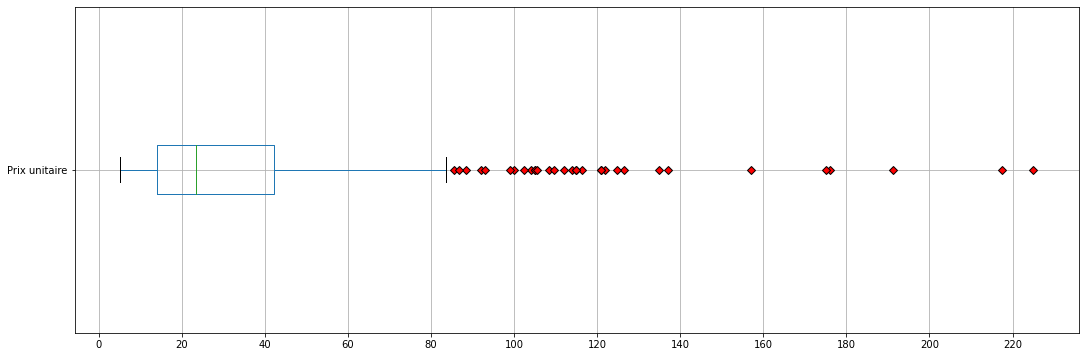

In [43]:
green_diamond = dict(markerfacecolor='r', marker='D')
erp_web_final.boxplot(column="Prix unitaire", figsize = (18,6), flierprops=green_diamond, vert=False)
plt.xticks([0,20,40,60,80,100,120,140,160,180,200,220])
plt.show()

### <span style="color : #000000">***Les mesures de tendance centrale***</span>

In [44]:
print("La moyenne:\n", erp_web_final['Prix unitaire'].mean())
print("La médiane:\n", erp_web_final['Prix unitaire'].median())
print("Le mode est:\n", erp_web_final['Prix unitaire'].mode())

La moyenne:
 32.49313725490197
La médiane:
 23.55
Le mode est:
 0    19.0
dtype: float64


### <span style="color : #000000">***Calcul des quartiles et IQR***</span>

In [45]:
#On calcule Q1
q1 = erp_web_final['Prix unitaire'].quantile(q=0.25)
print('Le 1er quartile est:', q1)

#On calcule Q3
q3 = erp_web_final['Prix unitaire'].quantile(q=0.75)
print('Le 3ème quartile est:', q3)

#On calcule l'écart interquartile (IQR)
IQR = q3 - q1

print('Le IQR est:', IQR)

Le 1er quartile est: 14.1
Le 3ème quartile est: 42.175000000000004
Le IQR est: 28.075000000000003


### <span style="color : #000000">***Borne Inférieure***</span>

In [46]:
#On calcule la borne inférieure à l'aide du Q1 et de l'écart interquartile
borne_inf = q1 - (1.5*IQR)
print('La borne inférieure est:', borne_inf)

La borne inférieure est: -28.012500000000003


### <span style="color : #000000">***Borne supérieure***</span>

In [47]:
#On calcule la borne supérieure à l'aide du Q3 et de l'écart interquartile
borne_sup = q3 + (1.5*IQR)
print('La borne supérieure est:', borne_sup)

La borne supérieure est: 84.28750000000001


### <span style="color : #000000">***Quantité de valeurs aberrantes***</span>

In [48]:
print('La quantité de valeurs aberrantes est:', len(erp_web_final['Prix unitaire'].loc[erp_web_final['Prix unitaire'] > borne_sup]))

La quantité de valeurs aberrantes est: 32


### <span style="color : #000000">***Valeurs aberrantes***</span>

In [49]:
print('Les valeurs aberrantes sont:', np.sort(erp_web_final['Prix unitaire'].loc[erp_web_final['Prix unitaire'] > borne_sup]))

Les valeurs aberrantes sont: [ 85.6  86.8  88.4  92.   93.   99.  100.  102.3 104.  105.  105.  105.6
 108.5 109.6 112.  114.  115.  115.  116.4 121.  121.  122.  124.8 126.5
 135.  137.  157.  175.  176.  191.3 217.5 225. ]


### <span style="color : #00BFFF">***Liste des produits qui contiennent des valeurs aberrantes dans le prix (Boxplot)***</span>

In [50]:
Liste_produit_df = erp_web_final.loc[(erp_web_final['Prix unitaire']>borne_sup)]
Liste_produit_df.sort_values("Prix unitaire", ascending=True)

,Id du produit,Id web,Titre de la publication,Date de publication,Prix unitaire,Ventes totales,Chiffre d'affaires
206,4359,13853,Champagne Larmandier-Bernier Grand Cru Les Che...,2018-03-02 11:11:48,85.6,1.0,85.6
448,5026,13913,Champagne Agrapart &amp; Fils Minéral Extra Br...,2018-07-18 10:46:30,86.8,0.0,0.0
65,4132,11668,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,2018-02-13 11:43:55,88.4,0.0,0.0
514,5565,19822,Tempier Bandol Cabassaou 2017,2018-11-26 10:59:10,92.0,0.0,0.0
616,5916,14774,Wemyss Malts Single Cask Scotch Whisky Chocola...,2019-04-04 16:39:24,93.0,0.0,0.0
674,6214,11601,Domaine des Comtes Lafon Volnay 1er Cru Champa...,2019-07-25 09:15:41,99.0,0.0,0.0
63,4115,15382,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,2018-02-13 11:08:45,100.0,0.0,0.0
386,4903,14805,Domaine Des Croix Corton Grand Cru Les Grèves ...,2018-05-15 10:10:57,102.3,0.0,0.0
223,4407,3509,Cognac Frapin Cigar Blend,2018-03-22 11:49:53,104.0,1.0,104.0
440,5008,11602,Domaine des Comtes Lafon Volnay 1er Cru Santen...,2018-07-17 10:52:41,105.0,0.0,0.0


## <span style="color : #00BFFF">***Z-Score***</span>

In [51]:
mean = np.mean(erp_web_final['Prix unitaire'])
std = np.std(erp_web_final['Prix unitaire'])
print('La moyenne des prix unitaire est :', mean)
print("L'écart-type de la variable prix unitaire est:", std)

La moyenne des prix unitaire est : 32.49313725490197
L'écart-type de la variable prix unitaire est: 27.791042941002935


### <span style="color : #000000">***Valeurs aberrantes***</span>

In [52]:
threshold = 2
outlier = []
for i in erp_web_final['Prix unitaire']:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('Les valeurs aberrantes sont:', np.sort(outlier))

Les valeurs aberrantes sont: [ 88.4  92.   93.   99.  100.  102.3 104.  105.  105.  105.6 108.5 109.6
 112.  114.  115.  115.  116.4 121.  121.  122.  124.8 126.5 135.  137.
 157.  175.  176.  191.3 217.5 225. ]


### <span style="color : #000000">***Quantité de valeurs aberrantes***</span>

In [53]:
print('La quantité de valeurs aberrantes est:', len(outlier))

La quantité de valeurs aberrantes est: 30


### <span style="color : #00BFFF">***Liste des produits qui contiennent des valeurs aberrantes dans le prix (Z-SCORE)***</span>

In [54]:
Liste_produit_Z_df = erp_web_final.loc[(erp_web_final['Prix unitaire']>=outlier[1])]
Liste_produit_Z_df.sort_values("Prix unitaire", ascending=True)

,Id du produit,Id web,Titre de la publication,Date de publication,Prix unitaire,Ventes totales,Chiffre d'affaires
65,4132,11668,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,2018-02-13 11:43:55,88.4,0.0,0.0
514,5565,19822,Tempier Bandol Cabassaou 2017,2018-11-26 10:59:10,92.0,0.0,0.0
616,5916,14774,Wemyss Malts Single Cask Scotch Whisky Chocola...,2019-04-04 16:39:24,93.0,0.0,0.0
674,6214,11601,Domaine des Comtes Lafon Volnay 1er Cru Champa...,2019-07-25 09:15:41,99.0,0.0,0.0
63,4115,15382,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,2018-02-13 11:08:45,100.0,0.0,0.0
386,4903,14805,Domaine Des Croix Corton Grand Cru Les Grèves ...,2018-05-15 10:10:57,102.3,0.0,0.0
223,4407,3509,Cognac Frapin Cigar Blend,2018-03-22 11:49:53,104.0,1.0,104.0
440,5008,11602,Domaine des Comtes Lafon Volnay 1er Cru Santen...,2018-07-17 10:52:41,105.0,0.0,0.0
439,5007,12791,Domaine des Comtes Lafon Volnay 1er Cru Santen...,2018-07-17 10:36:03,105.0,0.0,0.0
666,6201,14596,David Duband Chambolle-Musigny 1er Cru Les Sen...,2019-07-23 10:37:14,105.6,0.0,0.0


## <span style="color : #00BFFF">***Scatter plot***</span>

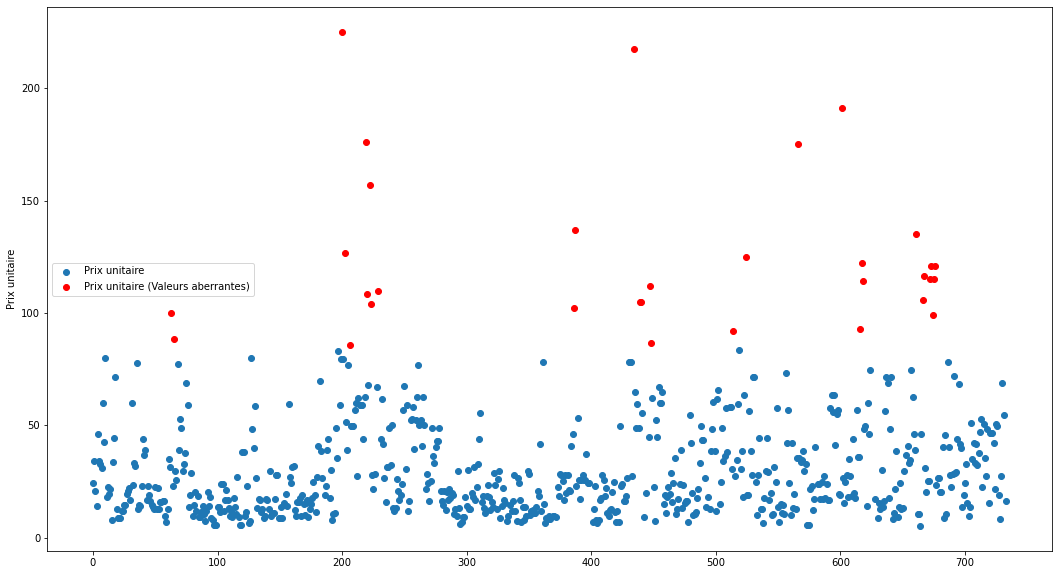

In [55]:
#Extraire les quantiles de la colonne
lower_quantile = erp_web_final['Prix unitaire'].quantile(0.25)
upper_quantile = erp_web_final['Prix unitaire'].quantile(0.75)

#Calcul IQR
IQR = upper_quantile - lower_quantile
    
#Extraire lower et upper bound
lower_bound = lower_quantile - 1.5 * IQR
upper_bound = upper_quantile + 1.5 * IQR

# On se créé 2 DataFrame pour séparé les couleurs
only_ok = erp_web_final[(erp_web_final['Prix unitaire'] < upper_bound) & (erp_web_final['Prix unitaire'] > lower_bound)]
only_outliers = erp_web_final[(erp_web_final['Prix unitaire'] > upper_bound) | (erp_web_final['Prix unitaire'] < lower_bound)]

# On plot
fig, ax = plt.subplots(figsize = (18,10))
plt.ylabel('Prix unitaire')
plt.scatter(only_ok['Prix unitaire'].index, only_ok['Prix unitaire'].values)
plt.scatter(only_outliers['Prix unitaire'].index, only_outliers['Prix unitaire'].values,c='red')
plt.legend(("Prix unitaire","Prix unitaire (Valeurs aberrantes)"),loc="center left")
plt.show()

### <span style="color : #00BFFF">***Liste des produits qui contiennent des valeurs aberrantes dans le prix (Scatter plot)***</span>

In [56]:
Liste_produit_SP_df = erp_web_final.loc[(erp_web_final['Prix unitaire']>upper_bound)]
Liste_produit_SP_df.sort_values("Prix unitaire", ascending=True)

,Id du produit,Id web,Titre de la publication,Date de publication,Prix unitaire,Ventes totales,Chiffre d'affaires
206,4359,13853,Champagne Larmandier-Bernier Grand Cru Les Che...,2018-03-02 11:11:48,85.6,1.0,85.6
448,5026,13913,Champagne Agrapart &amp; Fils Minéral Extra Br...,2018-07-18 10:46:30,86.8,0.0,0.0
65,4132,11668,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,2018-02-13 11:43:55,88.4,0.0,0.0
514,5565,19822,Tempier Bandol Cabassaou 2017,2018-11-26 10:59:10,92.0,0.0,0.0
616,5916,14774,Wemyss Malts Single Cask Scotch Whisky Chocola...,2019-04-04 16:39:24,93.0,0.0,0.0
674,6214,11601,Domaine des Comtes Lafon Volnay 1er Cru Champa...,2019-07-25 09:15:41,99.0,0.0,0.0
63,4115,15382,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,2018-02-13 11:08:45,100.0,0.0,0.0
386,4903,14805,Domaine Des Croix Corton Grand Cru Les Grèves ...,2018-05-15 10:10:57,102.3,0.0,0.0
223,4407,3509,Cognac Frapin Cigar Blend,2018-03-22 11:49:53,104.0,1.0,104.0
440,5008,11602,Domaine des Comtes Lafon Volnay 1er Cru Santen...,2018-07-17 10:52:41,105.0,0.0,0.0
